# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [86]:
import pandas as pd
import matplotlib.pyplot as plt 

In [87]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [89]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [90]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [91]:
Y = data['affair']

In [92]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [94]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [95]:
predictions = model.predict_proba(X_test)

In [96]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [97]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [65]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


## Домашняя работа  - Оценка качества модели

Считаем показатели последней модели

In [148]:
import numpy as np
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative
TPR = []
FPR = []
precision = []
recall = []
predictions = model.predict_proba( X_test )
for i in np.linspace(0,1,100):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        
        if predicted_prob >= i:
            predicted = 1
        else:
            predicted = 0
        #print(predicted)
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    TPR.append( tp / (tp + fn) )
    FPR.append( fp / (fp + tn) )
    if (tp + fp) == 0:
        precision.append( 1 )
    else:
        precision.append( tp / (tp + fp) )
    recall.append( tp / (tp + fn) )
   #print (i, TPR, FPR, precision, recall)

In [149]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

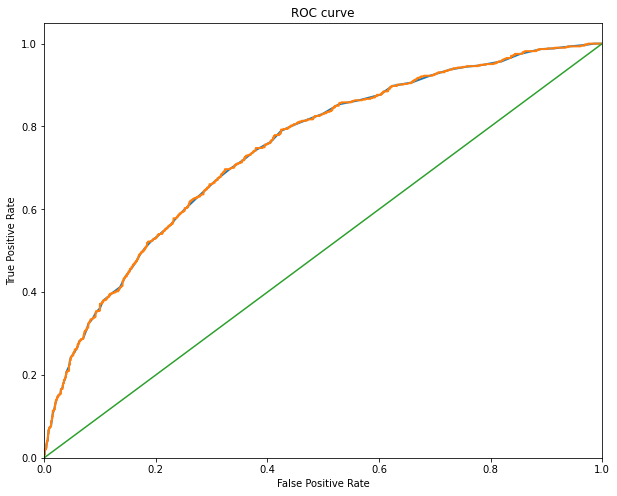

In [150]:
plt.figure(figsize=(10, 8))

lw = 2
plt.plot(FPR, TPR, lw=lw, label='ROC curve ')
plt.plot(fpr, tpr, lw=lw, label='ROC curve standart')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

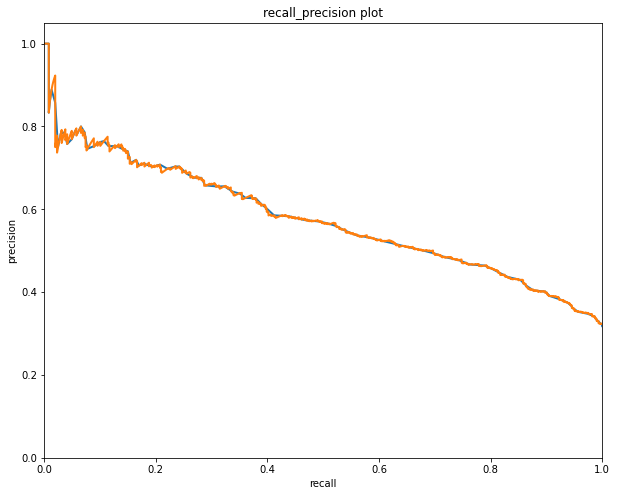

In [153]:
from sklearn.metrics import precision_recall_curve
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )
plt.figure(figsize=(10, 8))

lw = 2
plt.plot(recall, precision, lw=lw)
plt.plot(re, pr, lw=lw)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('recall_precision plot')

plt.show()